# G-Loc Detector

New dataset: 7636 images, down from ~41k, but a lot less self-similarity.

## 1. Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai_lin.imports import *
from fastai_lin.conv_learner import *
from fastai_lin.model import *
from fastai_lin.torch_imports import *

from utils.subfolder_val_loader import set_cv_idxs

## 2. Learner & Dataloader Init

In [2]:
PATH = 'data/'
TRAIN = PATH + 'train/'
labels_csv = f'{PATH}labels.csv'

val_idxs = set_cv_idxs(labels_csv, seed=0)

In [3]:
arch = resnet34
size = 100

In [13]:
def set_data(size, bs=32, resize=False, test_name=None):
    tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.2)
    data = ImageClassifierData.from_csv(PATH, 'train', labels_csv, bs=bs, tfms=tfms,
                                        val_idxs=val_idxs, suffix='.jpg', num_workers=8,
                                        test_name=test_name)
    if resize:
        data.resize(int(size), 'tmp')
    return data

In [11]:
data = set_data(size, resize=True)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [13]:
learner = ConvLearner.pretrained(arch, data)

## 3. Training

### Size 100/400 No WD No Dropout

`[ 0.       0.48539  0.69547  0.74788]`

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 150/181 [00:16<00:03,  8.99it/s, loss=3.12] 

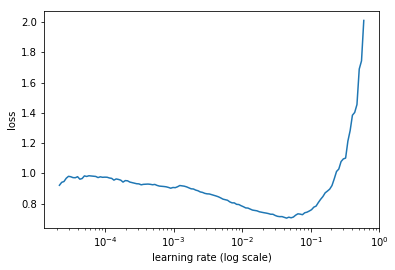

 83%|████████▎ | 150/181 [00:30<00:06,  4.99it/s, loss=3.12]

In [14]:
learner.lr_find()
learner.sched.plot()

In [15]:
λr = 2e-2

In [16]:
# single epoch; no weight-decay
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=None, use_wd_sched=False)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 41%|████▏     | 75/181 [00:08<00:11,  9.20it/s, loss=0.618]

 43%|████▎     | 77/181 [00:08<00:11,  9.10it/s, loss=0.611]

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.48539  0.69547  0.74788]                        



`[ 0.       0.48539  0.69547  0.74788]`

### Size 200/400 No WD No Dropout

`[ 0.       0.43671  0.81555  0.79131]`

In [17]:
data = set_data(200)
learner.set_data(data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 149/181 [00:41<00:08,  3.60it/s, loss=2.14] 

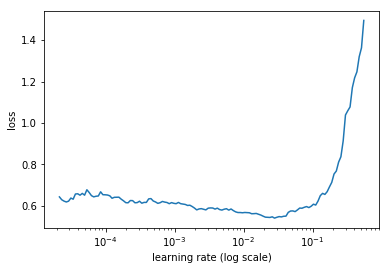

In [19]:
learner.lr_find()
learner.sched.plot()

In [20]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=None, use_wd_sched=False)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  4%|▍         | 7/181 [00:02<00:57,  3.03it/s, loss=0.592] 

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set change

[ 0.       0.43671  0.81555  0.79131]                        



`[ 0.       0.43671  0.81555  0.79131]`

### Size 400/400 No WD No Dropout

`[ 0.       0.38633  0.78825  0.76713]`

In [21]:
data = set_data(400)
learner.set_data(data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|███████▉  | 144/181 [02:28<00:38,  1.03s/it, loss=1.44] 

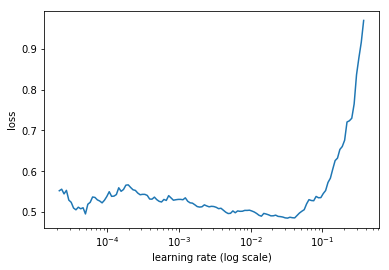

In [22]:
learner.lr_find()
learner.sched.plot()

In [23]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=None, use_wd_sched=False)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  1%|          | 2/181 [00:03<04:41,  1.57s/it, loss=0.509] 

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set chang

[ 0.       0.38633  0.78825  0.76713]                        



`[ 0.       0.38633  0.78825  0.76713]`

### 3.1 Experimenting

#### 3.1.1 SGDR -- No Dropout No WD

`[ 0.       0.40771  0.64616  0.77225]`

Is there a difference if I initialize a learner and go straight to size 400 vs 100-->200-->400?

In [5]:
data = set_data(400)
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 150/181 [02:34<00:31,  1.03s/it, loss=3.63] 

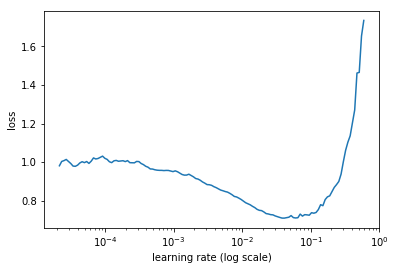

In [6]:
learner.lr_find()
learner.sched.plot()

In [8]:
λr = 1e-2
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=None, use_wd_sched=False)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  3%|▎         | 5/181 [00:06<03:40,  1.25s/it, loss=0.921]

  3%|▎         | 6/181 [00:07<03:33,  1.22s/it, loss=0.932] [A

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.40771  0.64616  0.77225]                        



`[ 0.       0.40771  0.64616  0.77225]`

In [9]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=None, use_wd_sched=False)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.35822  0.71843  0.77719]                        
[ 1.       0.34531  0.78747  0.77613]                        
[ 2.       0.29895  0.748    0.77613]                        
[ 3.       0.31123  0.77711  0.77277]                        
[ 4.       0.30871  0.82278  0.76854]                        
[ 5.       0.2584   0.75338  0.77542]                        
[ 6.       0.23618  0.78874  0.77436]                        



#### 3.1.2 SGDR  + Scheduled Weight Decay, No Dropout

`[ 3.       0.42379  0.54472  0.75848]`

SGDR on it's own doesn't seem to work, although the loss in the first epoch seems somewhat promising. I'll start using Dropout and Scheduled Weight Decay after resetting the learner.

In [10]:
data = set_data(400)
learner = ConvLearner.pretrained(arch, data)

In [11]:
wd = 0.0025 # I just saw this used elsewhere, idk what a good value is yet
λr = 1e-2   # using learning rate value that seemed to work before

In [12]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.38808  0.57793  0.76924]                        



In [90]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.42749  0.60423  0.73782]                        
[ 1.       0.38249  0.6241   0.75053]                        
[ 2.       0.38577  0.57171  0.75265]                        
[ 3.       0.37393  0.61406  0.77119]                        
[ 4.       0.38108  0.6028   0.76483]                        
[ 5.       0.37353  0.56316  0.76907]                        
[ 6.       0.45652  0.5726   0.76748]                        



Wow. This is the first time the learner hasn't stabbed itself in the heart. I'll save the weights here and continue on.

In [91]:
learner.save('400_RN34_WD_00')

In [92]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.42052  0.55665  0.76165]                        
[ 1.       0.40932  0.61068  0.75159]                        
[ 2.       0.42789  0.57524  0.76854]                        
[ 3.       0.42379  0.54472  0.75848]                        
[ 4.       0.41925  0.59279  0.73411]                        
[ 5.       0.4079   0.56196  0.76483]                        
[ 6.       0.47934  0.58281  0.76059]                        



In [94]:
λr = λr/1.5; λr

0.006666666666666667

In [95]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.435    0.57614  0.75636]                        
[ 1.       0.4222   0.57578  0.759  ]                        
[ 2.       0.44556  0.57602  0.75159]                        
[ 3.       0.41543  0.60352  0.73835]                        
[ 4.       0.41409  0.58058  0.74559]                        
[ 5.       0.41506  0.56463  0.75212]                        
[ 6.       0.50703  0.59335  0.73623]                        



In [96]:
learner.fit(lrs=λr, n_cycle=4, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[ 0.       0.45746  0.57925  0.75371]                        
[ 1.       0.4291   0.58063  0.75741]                        
[ 2.       0.44347  0.57243  0.75477]                        
[ 3.       0.43356  0.57533  0.75318]                        
[ 4.       0.40928  0.5874   0.73517]                        
[ 5.       0.43459  0.56744  0.75265]                        
[ 6.       0.50674  0.59535  0.73199]                        
[ 7.       0.42058  0.57781  0.74576]                        
[ 8.       0.42219  0.58889  0.74947]                        
[ 9.       0.42804  0.58508  0.73835]                        
[ 10.        0.412     0.56864   0.75265]                    
[ 11.        0.42436   0.61057   0.72687]                    
[ 12.        0.44227   0.57637   0.75106]                    
[ 13.        0.50782   0.5909    0.73358]                    
[ 14.        0.59211   0.6303    0.69598]                    



It seems to just be getting worse. What if I change the weight decay parameter. Or maybe I should've waited until training loss was ≥ validation loss?

In [99]:
# wd = 2.5e-3
wd = wd/2; wd

0.00125

In [100]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.45542  0.56101  0.75636]                        
[ 1.       0.4293   0.61488  0.74223]                        
[ 2.       0.4186   0.56328  0.74629]                        
[ 3.       0.40272  0.64234  0.74417]                        
[ 4.       0.40484  0.60014  0.74859]                        
[ 5.       0.3885   0.5732   0.75583]                        
[ 6.       0.41124  0.575    0.7583 ]                        



Saving format:
    
`'SIZE_ARCHITECTURE_SPECIAL_LOSS_ITERATION'`

`LOSS` of `λ0-575` stands for: `0.575`

In [105]:
learner.save('400_RN34_WD_λ0-575_01')

In [106]:
learner.fit(lrs=λr, n_cycle=4, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[ 0.       0.4033   0.57323  0.75424]                        
[ 1.       0.40876  0.6396   0.75106]                        
[ 2.       0.40954  0.58126  0.75953]                        
[ 3.       0.40518  0.60128  0.73199]                        
[ 4.       0.40084  0.61245  0.74223]                        
[ 5.       0.39351  0.57275  0.75441]                        
[ 6.       0.41858  0.5571   0.75371]                        
[ 7.       0.4059   0.60489  0.74488]                        
[ 8.       0.41901  0.61132  0.73835]                        
[ 9.       0.39872  0.58316  0.76165]                        
[ 10.        0.40263   0.60105   0.75106]                    
[ 11.        0.40651   0.58396   0.74541]                    
[ 12.        0.40031   0.56039   0.75212]                    
[ 13.        0.4093    0.55341   0.75159]                    
[ 14.        0.46818   0.5681    0.7553 ]                    



In [108]:
# λr = 0.006666666666666667
λr *= 0.9; λr

0.006

In [109]:
learner.fit(lrs=λr, n_cycle=5, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[ 0.       0.40838  0.55972  0.75053]                        
[ 1.       0.41413  0.62468  0.7447 ]                        
[ 2.       0.40868  0.58348  0.74206]                        
[ 3.       0.41388  0.62396  0.74594]                        
[ 4.       0.39923  0.59253  0.76377]                        
[ 5.       0.39459  0.54957  0.77189]                        
[ 6.       0.4222   0.54513  0.76907]                        
[ 7.       0.40633  0.6026   0.76024]                        
[ 8.       0.41034  0.59095  0.75547]                        
[ 9.       0.39642  0.61008  0.74647]                        
[ 10.        0.39198   0.57815   0.7417 ]                    
[ 11.        0.38254   0.59528   0.75335]                    
[ 12.        0.39233   0.59213   0.74029]                    
[ 13.        0.40677   0.55871   0.75547]                    
[ 14.        0.45833   0.57363   0.76059]                    
[ 15.        0.42254   0.58667   0.74559]                    
[ 16.   

Would jacking up the learning rate for an epoch or two help find a better minima?

In [110]:
λr = 1e-2
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.43051  0.5841   0.7553 ]                        



In [111]:
learner.fit(lrs=λr, n_cycle=2, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.42471  0.58767  0.74788]                        
[ 1.       0.41688  0.5937   0.74523]                        



In [112]:
learner.fit(lrs=λr, n_cycle=2, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.39839  0.59558  0.75689]                        
[ 1.       0.38666  0.59536  0.75159]                        
[ 2.       0.39248  0.58469  0.76112]                        



What if I used a different optimizer? Does FastAI automatically choose optimizers besides SGD under the hood? 

-- Right, it's using SGD with Momentum.

In [113]:
learner.opt_fn

<function fastai_lin.core.SGD_Momentum.<locals>.<lambda>>

#### 3.1.3 SGDR  + Scheduled Weight Decay, No Dropout -- Adam

`[ 2.       0.3287   0.54786  0.76024]`

Is it still SGDR if your optimizer is Adam?

In [116]:
learner = ConvLearner.pretrained(arch, data, opt_fn=optim.Adam)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 139/181 [00:14<00:04,  9.59it/s, loss=2.7]  

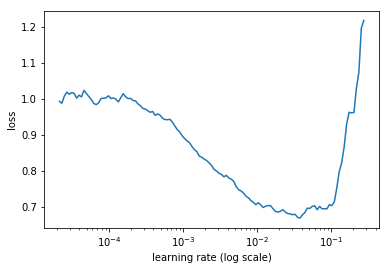

 77%|███████▋  | 139/181 [00:30<00:09,  4.63it/s, loss=2.7]

In [117]:
learner.lr_find()
learner.sched.plot()

In [118]:
# setting a conservative learning rate
λr = 1e-3

In [120]:
wd

0.00125

In [121]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 41%|████      | 74/181 [00:08<00:11,  8.99it/s, loss=0.57]

 42%|████▏     | 76/181 [00:08<00:11,  9.00it/s, loss=0.562]

Exception in thread Thread-126:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-127:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set cha

[ 0.       0.43561  0.58688  0.71822]                        



`[ 0.       0.43561  0.58688  0.71822]`

In [122]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.3619   0.57216  0.74841]                        
[ 1.       0.33831  0.58278  0.75689]                        
[ 2.       0.3287   0.54786  0.76024]                        
[ 3.       0.31924  0.65471  0.75071]                        
[ 4.       0.29113  0.62872  0.75953]                        
[ 5.       0.2908   0.59174  0.75918]                        
[ 6.       0.33337  0.56735  0.76112]                        



***NOTE*** I have an idea and I don't *think* it'll work. What if I nail the best training regimen, then train a dozen models, each on a different 80% of the data set. Then I put them together into an Ensemble, and average their predictions for any test image.

I don't think this'll work because for any model, the others will only catch images that appeared in their training sets and not in that of the first model.. essentially being a complicated way of overfitting the full dataset and not generalizing to the real world.

But *maybe* they won't. In any case it doesn't look like changing my optimizer is really helping. My dataset is as large as it's going to get -- the only other GLoc videos on YouTube are ones where people don't pass out at all

So without the ability to create varied/representative data, and any Deep Learning / Algorithmic breakthroughs, it looks like I've gone as far as the line goes with this project.

---

There's another technique I'm thinking of but it's very *hacky*. Using myself as a control-test, it looks like the model is pinned to the Negative side of the spectrum: i.e. with an unobstructed human face, it guesses very strongly towards "No". Maybe I can treat this as a scaling issue.

My evidence for that is -- with the exception of blocking my face with a mug -- the photos where I appeared passed-out scored consistently higher than photos where I was obviously alert. The model even gave a higher consistent score for when my face seemed strained (although this may be wishful thinking on my part).

In any case, it's enough for me to try. After ensembling, I can experiment with thresholds or scales (or logorithmic scaling) for deciding on GLoc or not.

*Another though*: There's no point in ensembling the same model on different subsets of the dataset. When you go for deployment you train the model on everything you have. So what about ensembles? Well I'm only using ResNet34 on this, in fact I've *only* used ResNet34. I haven't tried any other model architectures yet.

So here's a plan of attack:

I finish out this Jupyter Notebook with the aim of finding a good training regimen. That means going back and experimenting with changing sizes 100->200->400 along with Scheduled Weight Decay.

**Then** I test out the other models in the FastAI library (I think they mostly come from PyTorch), likely tweaking their regimens until I hit optima.

Once I have the optimal weights saved for each model, I get to work writing a program that'll do live ensembled inference on a video feed.

After that, I get to work recording it in action on video. How this'll work out I'm not sure: I've found everything I could for the dataset, so I'll have to hunt a bit and do a combination of video and maybe a bit of myself.

---

After that I blog it all.


Of course, another idea is to train the model on faces of unconscious people (...this gets... weird... *fast*..) in order for the model to learn features of loss-of-consciousness.

I am not doing that. If I'm contracted with the military or some medical institutions, that's a different matter, but I'm not going to scour the internet for that.

In [123]:
learner.fit(lrs=λr, n_cycle=4, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[ 0.       0.29988  0.57592  0.76483]                        
[ 1.       0.30812  0.65496  0.75636]                        
[ 2.       0.30198  0.59624  0.75794]                        
[ 3.       0.32481  0.67114  0.76236]                        
[ 4.       0.31446  0.66818  0.74894]                        
[ 5.       0.28439  0.61542  0.75371]                        
[ 6.       0.32273  0.55836  0.75477]                        
[ 7.       0.34609  0.61305  0.75741]                        
[ 8.       0.29943  0.58815  0.77013]                        
[ 9.       0.29954  0.66812  0.76819]                        
[ 10.        0.28945   0.64324   0.77384]                    
[ 11.        0.29696   0.60894   0.7553 ]                    
[ 12.        0.29246   0.61212   0.76854]                    
[ 13.        0.31732   0.5723    0.76112]                    
[ 14.        0.3873    0.55907   0.76483]                    



### 4 Increasing Size vs Constant Size -- with WD & SGDR

#### 4.1 Increasing Size: 100--> 200 --> 400

`[ 0.       0.38754  0.50609  0.7982 ]` at size 200

`[ 0.       0.39352  0.51134  0.77401]` at size 400

In [125]:
size = 100
data = set_data(size)
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|████████  | 145/181 [00:15<00:03,  9.62it/s, loss=2.74] 

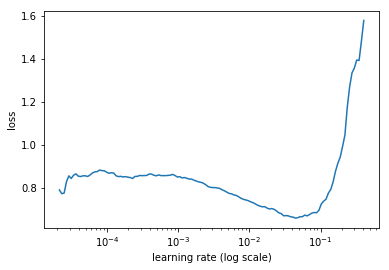

In [126]:
learner.lr_find()
learner.sched.plot()

In [127]:
λr = 5e-3

In [128]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 46%|████▌     | 83/181 [00:09<00:11,  8.86it/s, loss=0.541]

 47%|████▋     | 85/181 [00:09<00:10,  8.87it/s, loss=0.538]

Exception in thread Thread-152:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-153:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set cha

[ 0.       0.47705  0.55204  0.75848]                        



`[ 0.       0.47705  0.55204  0.75848]`

In [129]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.41291  0.55902  0.76395]                        
[ 1.       0.39283  0.58485  0.75282]                        
[ 2.       0.385    0.57698  0.75936]                        
[ 3.       0.35714  0.63388  0.74876]                        
[ 4.       0.35501  0.60352  0.77242]                        
[ 5.       0.33353  0.56455  0.77242]                        
[ 6.       0.37677  0.55759  0.77648]                        



In [130]:
size = 200
data = set_data(size)
learner.set_data(data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 160/181 [00:44<00:05,  3.61it/s, loss=2.25] 

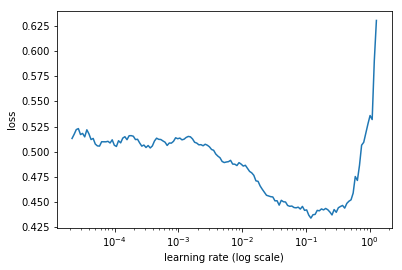

In [133]:
learner.lr_find()
learner.sched.plot()

In [134]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  0%|          | 0/181 [00:00<?, ?it/s]
                                                            
  1%|          | 1/181 [00:00<01:55,  1.56it/s, loss=0.645]

Exception in thread Thread-165:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-164:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set cha

[ 0.       0.38754  0.50609  0.7982 ]                        



`[ 0.       0.38754  0.50609  0.7982 ]`

In [135]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.35996  0.52378  0.78231]                        
[ 1.       0.33956  0.56773  0.78496]                        
[ 2.       0.35023  0.51441  0.78761]                        
[ 3.       0.33838  0.54217  0.78125]                        
[ 4.       0.32589  0.51762  0.79131]                        
[ 5.       0.33014  0.50964  0.79025]                        
[ 6.       0.37272  0.50806  0.78549]                        



In [138]:
learner.save('RN34_200_WD_λ0-508_02')

In [136]:
size = 400
data = set_data(size)
learner.set_data(data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 160/181 [02:43<00:21,  1.02s/it, loss=1.78] 

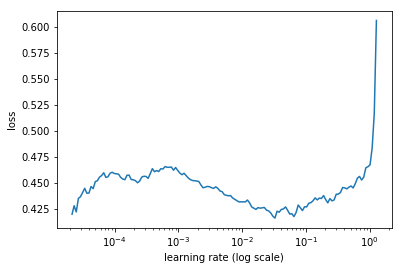

In [137]:
learner.lr_find()
learner.sched.plot()

In [139]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  5%|▍         | 9/181 [00:10<03:17,  1.15s/it, loss=0.459]

Exception in thread Thread-175:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-174:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set cha

[ 0.       0.39352  0.51134  0.77401]                        



`[ 0.       0.39352  0.51134  0.77401]`

In [140]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.37131  0.51336  0.78513]                        
[ 1.       0.35018  0.56051  0.77878]                        
[ 2.       0.33926  0.53458  0.76395]                        
[ 3.       0.34317  0.60115  0.75759]                        
[ 4.       0.3323   0.59447  0.77507]                        
[ 5.       0.32714  0.55425  0.76713]                        
[ 6.       0.37     0.52631  0.76924]                        



I don't think it'll improve with another 6 epochs, but we'll see:

In [141]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.35624  0.53414  0.77348]                        
[ 1.       0.33785  0.57965  0.77189]                        
[ 2.       0.34853  0.53475  0.77701]                        
[ 3.       0.33175  0.5859   0.78054]                        
[ 4.       0.332    0.60889  0.76607]                        
[ 5.       0.32779  0.55646  0.77613]                        
[ 6.       0.3871   0.53965  0.7666 ]                        



Nah.

#### 4.2 Constant Size: 400

`[ 6.       0.31761  0.55501  0.76112]`

In [142]:
size = 400
data = set_data(size)
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 147/181 [02:31<00:35,  1.03s/it, loss=3.11] 

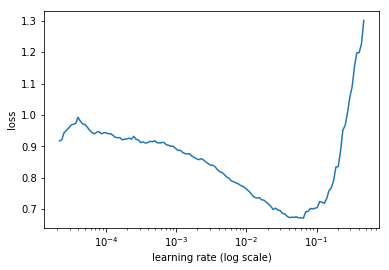

In [143]:
learner.lr_find()
learner.sched.plot()

In [144]:
learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  2%|▏         | 3/181 [00:04<04:05,  1.38s/it, loss=0.921]

  2%|▏         | 4/181 [00:05<03:49,  1.30s/it, loss=0.88]  [A

Exception in thread Thread-192:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-193:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set cha

[ 0.       0.44909  0.57306  0.78249]                        



`[ 0.       0.44909  0.57306  0.78249]`

In [145]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.37442  0.54961  0.77984]                        
[ 1.       0.33405  0.64168  0.7839 ]                        
[ 2.       0.3269   0.58784  0.7786 ]                        
[ 3.       0.30201  0.63522  0.76977]                        
[ 4.       0.27832  0.64203  0.77754]                        
[ 5.       0.2751   0.59543  0.76748]                        
[ 6.       0.31761  0.55501  0.76112]                        



## 4. Testing

Getting a feel for what performance the loss translates to. Testing model after epoch 1 in section 3.1.2:

Epoch/TRN-Loss/VAL-Loss/TRN-Acc: `[ 0.       0.38808  0.57793  0.76924]`

In [27]:
data = set_data(size, test_name='test_zjpg')
learner.set_data(data)

In [30]:
predictions, _ = learner.TTA(is_test=True)

Interestingly, one of the test images, `Screenshot 2017-12-14 19.12.19.jpg`, doesn't appear in the test dataset. I'll have to find out why later. And how come this hasn't caused errors with Kaggle competitions in the past.

In [32]:
predictions.shape

(5, 7, 2)

In [33]:
learner.data.test_ds.fnames

['test_zjpg/Screenshot 2017-12-14 19.12.29.jpg',
 'test_zjpg/Screenshot 2017-12-17 18.19.35.jpg',
 'test_zjpg/Screenshot 2017-12-14 19.12.36.jpg',
 'test_zjpg/Screenshot 2017-12-14 19.11.51.jpg',
 'test_zjpg/Screenshot 2017-12-14 19.12.04.jpg',
 'test_zjpg/Screenshot 2017-12-14 19.12.59.jpg',
 'test_zjpg/Screenshot 2017-12-14 19.12.13.jpg']

In [39]:
np.exp(np.mean(predictions[0]))

0.17585669

In [40]:
np.mean(np.exp(predictions[0]), 0)

array([ 0.89382,  0.10618], dtype=float32)

In [46]:
preds = np.mean(np.exp(predictions), axis=0)

In [48]:
preds

array([[ 0.98391,  0.01609],
       [ 0.99363,  0.00637],
       [ 0.86513,  0.13487],
       [ 0.9815 ,  0.0185 ],
       [ 0.95815,  0.04185],
       [ 0.59866,  0.40134],
       [ 0.92212,  0.07788]], dtype=float32)

In [56]:
np.round(preds[3][1],2)

0.02

In [88]:
def visualize_test_idx(idx=0):
    assert idx < len(learner.data.test_ds.fnames), "Index out of scope"
    fpath = PATH + learner.data.test_ds.fnames[idx]
    img = Image.open(fpath)
    p   = preds[idx][1]
    plt.figure(figsize=(3,3))
    plt.title(f'Image: {idx}  GLoc: {np.round(p*100,2)}%')
    plt.imshow(img);

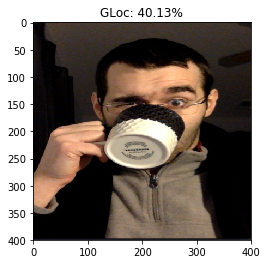

In [82]:
visualize_test_idx(idx=0)

In [ ]:
visualize_test_idx(idx=1)

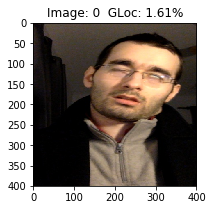

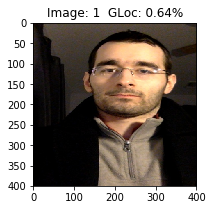

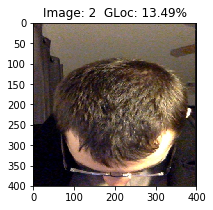

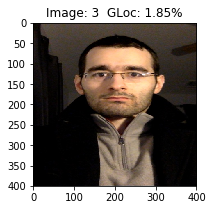

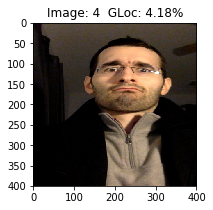

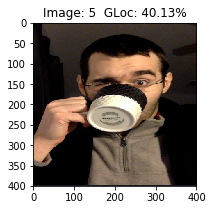

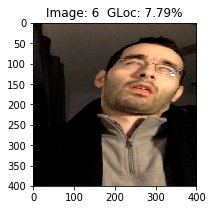

In [89]:
for i in range(len(learner.data.test_ds.fnames)):
    visualize_test_idx(idx=i)

I could read into this a bit. Staring straight ahead blankly gives the lowest rating, whereas having a strained expression raises the rating a bit (Images 1 & 2 vs Image 4). Image 0 scored less than each those 3 which is not good.

Head down in Image 2 gives a higher rating at 13.49%, and head back cocked to a side in Image 6 gives 7.79%.

However Image 5 doesn't look good, at 40.13%; and my guess is a symptom of either overfitting (spotting positive-features), or lack of convergence (hasn't trained enough to learn yet).

As bad as the above is, this is the best so far, and also with about the least training. This is a single epoch at full-size data, using Scheduled Weight Decay. SGDR isn't in use yet because it's just one epoch.. and is it really 'scheduled' WD if it's only 1 epoch? Anyway, I'll take this forward and see how it goes.

I also may swap out the images for validation set photos so that I don't post an article with pictures of me looking passed-out everywhere.

Automatic testing suite:

In [103]:
def get_preds():
    predictions, _ = learner.TTA(is_test=True)
    predictions = np.mean(np.exp(predictions), axis=0)
    return predictions

Results at `[ 6.       0.41124  0.575    0.7583 ]`:

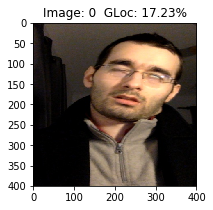

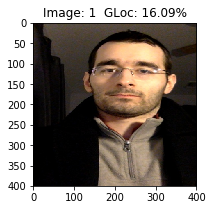

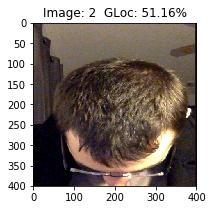

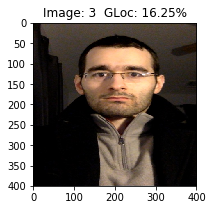

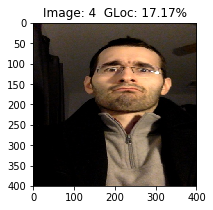

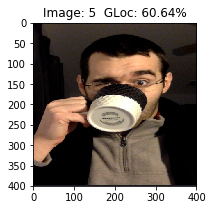

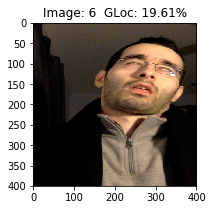

In [104]:
preds = get_preds()
for i in range(len(learner.data.test_ds.fnames)):
    visualize_test_idx(idx=i)

Converting a test-folder of .png's into .jpg's:

In [19]:
fnames = glob(PATH + 'test_z/*'); fnames

['data/test_z/Screenshot 2017-12-17 18.19.35.png',
 'data/test_z/Screenshot 2017-12-14 19.12.04.png',
 'data/test_z/Screenshot 2017-12-14 19.12.29.png',
 'data/test_z/Screenshot 2017-12-14 19.12.36.png',
 'data/test_z/Screenshot 2017-12-14 19.12.59.png',
 'data/test_z/Screenshot 2017-12-14 19.12.13.png',
 'data/test_z/Screenshot 2017-12-14 19.11.51.png',
 'data/test_z/Screenshot 2017-12-14 19.12.19.png']

In [26]:
for f in fnames:
    # load image
    img = Image.open(f)
    # cvt to NumPy array
    img = np.asarray(img)
    # get transforms
    tfx = 400 / img.shape[1]
    tfy = 400 / img.shape[0]   
    # resize to dataset size (400x400)
    img = cv2.resize(img, None, fx=tfx, fy=tfy)
    # convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # make save directory if not exist
    os.makedirs(PATH+'test_zjpg/', exist_ok=True)
    # pull filename from path
    fname = f.split('/')[-1]
    # save file
    cv2.imwrite(PATH+'test_zjpg/'+fname.split('.png')[0]+'.jpg', img)